In [1]:
# Initialize the workspace
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import string

# Always make it pretty.
plt.style.use('ggplot')
sns.set_style(style="whitegrid")
%matplotlib inline

In [2]:
# Examine a lyrics JSON and extract the relevant information
with open('data/jsons2/Lyrics_21Savage.json') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [4]:
# Artist name
data['name']

'21 Savage'

In [5]:
data['songs'][0]

{'annotation_count': 18,
 'api_path': '/songs/3138854',
 'apple_music_id': '1254351757',
 'apple_music_player_url': 'https://genius.com/songs/3138854/apple_music_player',
 'description': {'plain': '“Bank Account” sees 21 Savage rapping about his wealth amongst other things over a dark beat produced by Metro Boomin and 21 Savage himself.\n\nThe track samples Coleridge-Taylor Perkinson’s 1974 song “Flashbulbs,” a sample also used on Travis Scott’s “Oh My Dis Side.”\n\nOn the 10th of November the music video was released, starring comedian Mike Epps and directed by Matt Swinsky.'},
 'embed_content': "<div id='rg_embed_link_3138854' class='rg_embed_link' data-song-id='3138854'>Read <a href='https://genius.com/21-savage-bank-account-lyrics'>“Bank Account” by 21\xa0Savage</a> on Genius</div> <script crossorigin src='//genius.com/songs/3138854/embed.js'></script>",
 'featured_video': False,
 'full_title': 'Bank Account by\xa021\xa0Savage',
 'header_image_thumbnail_url': 'https://images.genius

In [6]:
# Title
data['songs'][0]['title_with_featured']

'Bank Account'

In [7]:
# URL
data['songs'][0]['url']

'https://genius.com/21-savage-bank-account-lyrics'

In [8]:
# Lyrics
data['songs'][0]['lyrics'].replace("\n", " ")

"Ooh, ooh, ooh, ow, ow, ow Wow, wow, ow, ah, ow, ah, ah, ah  I buy a new car for the bitch (for real) I tear down the mall with the bitch (for real) You can't even talk to the bitch (no) She fucking with bosses and shit (on God) I pull up in 'Rari's and shit (skrrr) With choppers and Harley's and shit (for real) I be Gucci'd down (Gucci) You wearing Lacoste and shit (bitch) Yeah, Moncler, yuh, fur came off a bear, yuh (yeah) Triple homicide, put me in a chair, yuh (in jail) Triple cross the plug, we do not play fair, yuh (on God) Got 'em tennis chains on and they real blingy (bling) Draco make you do the chicken head like Chingy (Chingy) Walk in Neiman Marcus and I spend a light fifty (fifty) Please proceed with caution, shooters, they be right with me (21) Bad bitch, cute face and some nice titties $7500 on a Saint Laurent jacket (yeah) Bitch, be careful when you dumpin' your ashes (bitch) I ain't no sucker, I ain't cuffin' no action (nah) The skreets raised me, I'm a whole bastard (w

In [11]:
# Release Date
data['songs'][0]['release_date']

'2017-07-07'

In [36]:
# Album
type(data['songs'][6]['album']) == type(None)#['name']

True

In [42]:
# Producer
data['songs'][43]['producer_artists']#[0]['name']

list

In [43]:
### Putting it together for one artist

# Create lists for dataframe
artist = []
title = []
url = []
lyrics = []
date = []
album = []
producer = []

# Examine a lyrics JSON and extract the relevant information
with open('data/jsons2/Lyrics_21Savage.json') as f:
    data = json.load(f)
    
for idx in range(len(data['songs'])):
    # Artist name
    artist.append(str(data['name']))
    # Title
    title.append(str(data['songs'][idx]['title_with_featured']))
    # URL
    url.append(str(data['songs'][idx]['url']))
    # Lyrics
    lyrics.append(str(data['songs'][idx]['lyrics']))
    # Release Date
    date.append(data['songs'][idx]['release_date'])
    # Album
    if type(data['songs'][idx]['album']) == type(None):
        album.append('None')
    else:
        album.append(data['songs'][idx]['album']['name'])
    # Producer
    if not data['songs'][idx]['producer_artists']:
        producer.append('None')
    else:
        producer.append(data['songs'][idx]['producer_artists'][0]['name'])

In [50]:
for x in album:
    print(x)
    print('________________')

Issa Album
________________
i am﹥i was
________________
Free Guwop EP
________________
i am﹥i was
________________
i am﹥i was
________________
i am﹥i was
________________
None
________________
Issa Album
________________
None
________________
i am﹥i was
________________
i am﹥i was
________________
i am﹥i was
________________
Issa Album
________________
Slaughter King
________________
Issa Album
________________
i am﹥i was
________________
Issa Album
________________
None
________________
i am﹥i was
________________
i am﹥i was (Deluxe)
________________
i am﹥i was
________________
i am﹥i was
________________
Issa Album
________________
Issa Album
________________
Issa Album
________________
i am﹥i was
________________
The Slaughter Tape
________________
Issa Album
________________
Issa Album
________________
Issa Album
________________
i am﹥i was
________________
i am﹥i was
________________
Slaughter King
________________
Issa Album
________________
Issa Album
________________
Slaughter 

In [54]:
len(artist) == len(lyrics) == len(producer) == len(album) == len(date)

True

In [56]:
# Place data into dataframe
d = {'Artist':artist,
     'Title':title,
     'Album':album,
     'Producer':producer,
     'Release Date':date,
     'URL':url,
     'Lyrics':lyrics,}
df = pd.DataFrame(data=d)

In [57]:
df.head()

,Artist,Title,Album,Producer,Release Date,URL,Lyrics
0,21 Savage,Bank Account,Issa Album,Metro Boomin,2017-07-07,https://genius.com/21-savage-bank-account-lyrics,"Ooh, ooh, ooh, ow, ow, ow\nWow, wow, ow, ah, o..."
1,21 Savage,​a lot (Ft. J. Cole),i am﹥i was,DJ Dahi,2018-12-21,https://genius.com/21-savage-a-lot-lyrics,I love you\nTurn my headphone down a little bi...
2,21 Savage,Red Opps,Free Guwop EP,Sonny Digital,2015-07-02,https://genius.com/21-savage-red-opps-lyrics,"Yeah, yeah, yeah\nI pull up roll the window do..."
3,21 Savage,​ball w/o you,i am﹥i was,BEAM,2018-12-21,https://genius.com/21-savage-ball-w-o-you-lyrics,"Whoa\nWhoa, whoa\n\nYou runnin' 'round drinkin..."
4,21 Savage,​can't leave without it (Ft. Gunna & Lil Baby),i am﹥i was,CuBeatz,2018-12-21,https://genius.com/21-savage-cant-leave-withou...,"Yeah\nVVS look like a star, yeah\nI took the t..."


In [58]:
counter = Counter()
result = []
table = str.maketrans("","", string.punctuation.replace("'", ""))
for song in df['Lyrics'].values:
    result.extend(song.translate(table).split())
result

['Ooh',
 'ooh',
 'ooh',
 'ow',
 'ow',
 'ow',
 'Wow',
 'wow',
 'ow',
 'ah',
 'ow',
 'ah',
 'ah',
 'ah',
 'I',
 'buy',
 'a',
 'new',
 'car',
 'for',
 'the',
 'bitch',
 'for',
 'real',
 'I',
 'tear',
 'down',
 'the',
 'mall',
 'with',
 'the',
 'bitch',
 'for',
 'real',
 'You',
 "can't",
 'even',
 'talk',
 'to',
 'the',
 'bitch',
 'no',
 'She',
 'fucking',
 'with',
 'bosses',
 'and',
 'shit',
 'on',
 'God',
 'I',
 'pull',
 'up',
 'in',
 "'Rari's",
 'and',
 'shit',
 'skrrr',
 'With',
 'choppers',
 'and',
 "Harley's",
 'and',
 'shit',
 'for',
 'real',
 'I',
 'be',
 "Gucci'd",
 'down',
 'Gucci',
 'You',
 'wearing',
 'Lacoste',
 'and',
 'shit',
 'bitch',
 'Yeah',
 'Moncler',
 'yuh',
 'fur',
 'came',
 'off',
 'a',
 'bear',
 'yuh',
 'yeah',
 'Triple',
 'homicide',
 'put',
 'me',
 'in',
 'a',
 'chair',
 'yuh',
 'in',
 'jail',
 'Triple',
 'cross',
 'the',
 'plug',
 'we',
 'do',
 'not',
 'play',
 'fair',
 'yuh',
 'on',
 'God',
 'Got',
 "'em",
 'tennis',
 'chains',
 'on',
 'and',
 'they',
 'real',
 

In [59]:
counts = Counter(result).most_common(20)
words = []
numbers = []
for word, number in counts:
    words.append(word)
    numbers.append(number)

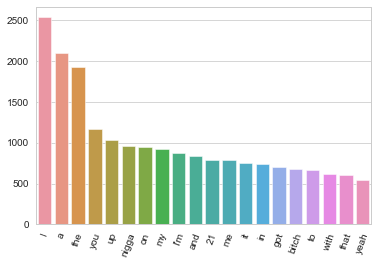

In [60]:
fig, ax = plt.subplots()
sns.barplot(x=words, y=numbers)
for tick in ax.get_xticklabels():
    tick.set_rotation(70)

In [91]:
# Place all songs into a single dataframe
artist = []
title = []
url = []
lyrics = []
date = []
album = []
producer = []
for path, subdir, files in os.walk(r'C:\Users\Broderick\Documents\assignments\RapLyrics\data\jsons2'):
    for file in files:
        with open(os.path.join(path,file)) as f:
            data = json.load(f)
        for idx in range(len(data['songs'])):
            # Artist name
            artist.append(str(data['name']))
            # Title
            title.append(str(data['songs'][idx]['title_with_featured']))
            # Release Date
            if not data['songs'][idx]['release_date']:
                date.append('None')
            else:
                date.append(data['songs'][idx]['release_date'])
            # Album
            if type(data['songs'][idx]['album']) == type(None):
                album.append('None')
            else:
                album.append(data['songs'][idx]['album']['name'])
            # Producer
            if not data['songs'][idx]['producer_artists']:
                producer.append('None')
            else:
                producer.append(data['songs'][idx]['producer_artists'][0]['name'])
            # URL
            url.append(str(data['songs'][idx]['url']))
            # Lyrics
            lyrics.append(str(data['songs'][idx]['lyrics']))

In [92]:
# Place data into dataframe
d = {'Artist':artist,
     'Title':title,
     'Album':album,
     'Producer':producer,
     'Release Date':date,
     'URL':url,
     'Lyrics':lyrics,}
df = pd.DataFrame(data=d)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28816 entries, 0 to 28815
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        28816 non-null  object
 1   Title         28816 non-null  object
 2   Album         28816 non-null  object
 3   Producer      28816 non-null  object
 4   Release Date  28816 non-null  object
 5   URL           28816 non-null  object
 6   Lyrics        28816 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [95]:
df.describe()

,Artist,Title,Album,Producer,Release Date,URL,Lyrics
count,28816,28816,28816,28816,28816,28816,28816
unique,100,27541,2383,3799,3820,28816,27860
top,Lil Wayne,Intro,None,None,None,https://genius.com/Twista-dirty-game-lyrics,\n Lyrics for this song h...
freq,1241,46,8238,8158,8992,1,469


In [96]:
len(df['Artist'].value_counts().index.values)

100

['and', 'they', "wishin'", 'and', "wishin'", 'and', "wishin'", 'and', "wishin'", 'they', "wishin'", 'on', 'me', 'yeah', 'i', 'been', "movin'", 'calm', "don't", 'start', 'no', 'trouble', 'with', 'me', 'tryna', 'keep', 'it', 'peaceful', 'is', 'a', 'struggle', 'for', 'me', "don't", 'pull', 'up', 'at', '6', 'am', 'to', 'cuddle', 'with', 'me', 'you', 'know', 'how', 'i', 'like', 'it', 'when', 'you', "lovin'", 'on', 'me', 'i', "don't", 'wanna', 'die', 'for', 'them', 'to', 'miss', 'me', 'yes', 'i', 'see', 'the', 'things', 'that', 'they', "wishin'", 'on', 'me', 'hope', 'i', 'got', 'some', 'brothers', 'that', 'outlive', 'me', 'they', "gon'", 'tell', 'the', 'story', 'shit', 'was', 'different', 'with', 'me', "god's", 'plan', "god's", 'plan', 'i', 'hold', 'back', 'sometimes', 'i', "won't", 'yuh', 'i', 'feel', 'good', 'sometimes', 'i', "don't", 'ayy', "don't", 'i', 'finessed', 'down', 'weston', 'road', 'ayy', "'nessed", 'might', 'go', 'down', 'a', 'god', 'yeah', 'wait', 'i', 'go', 'hard', 'on', 'sou

['first', 'time', 'in', 'a', 'long', 'time', "hurtin'", 'deeply', 'inside', 'first', 'time', 'in', 'a', 'long', 'time', "hurtin'", 'deeply', 'trust', 'trust', 'who', "watchin'", 'my', 'back', 'even', 'when', "i'm", 'in', 'the', 'booth', 'oh', 'trust', 'who', "doin'", 'my', 'thing', 'but', "i'm", 'down', 'to', 'come', 'clean', 'not', 'like', 'you', 'i', 'wanna', 'make', 'you', 'feel', 'the', "weight's", 'off', 'your', 'shoulders', 'too', "i'll", 'take', 'it', 'just', 'tell', 'me', 'it', "can't", 'be', 'that', 'crazy', 'and', 'even', 'if', 'it', 'is', 'that', 'crazy', 'baby', "i'll", 'take', 'it', 'i', 'want', 'you', 'i', 'know', "you're", 'not', 'an', 'angel', 'not', 'you', 'oh', 'just', 'save', 'it', "don't", 'waste', 'your', 'time', "'cause", "i'm", 'wavy', 'and', "i'm", "sayin'", 'things', 'that', 'i', "don't", 'mean', 'but', 'i', 'do', 'mean', 'and', 'i', "don't", 'want', 'you', 'to', 'miss', 'me', "'cause", "there's", 'no', 'way', 'that', "you're", 'sorry', 'and', "you're", 'crying

['two', 'thirty', 'baby', "won't", 'you', 'meet', 'me', 'by', 'the', 'bean', 'too', 'early', 'maybe', 'later', 'you', 'can', 'show', 'me', 'things', 'you', 'know', 'what', 'it', 'is', 'whenever', 'i', 'visit', 'windy', 'city', 'she', 'blowing', 'me', 'kisses', 'no', 'thirty', 'degrees', 'way', 'too', 'cold', 'so', 'hold', 'me', 'tight', 'will', 'i', 'see', 'you', 'at', 'the', 'show', 'tonight', 'will', 'i', 'see', 'you', 'at', 'the', 'show', 'tonight', 'ayy', 'truck', 'to', 'the', 'plane', 'to', 'the', 'truck', 'truck', 'to', 'the', 'hotel', 'lobby', 'me', 'i', 'go', 'through', 'underground', 'garages', "it's", 'presidential', 'suite', 'on', 'deposit', 'elevator', 'up', 'to', 'the', 'room', 'shower', 'up', 'and', 'then', 'we', 'hit', 'the', 'club', 'touchdown', 'gotta', 'see', "what's", 'up', 'area', 'code', 'in', 'my', 'phone', 'what', 'numbers', 'do', 'i', 'still', 'have', 'who', 'do', 'i', 'know', 'from', 'the', 'past', 'hit', 'one', 'she', 'say', 'she', 'got', 'a', 'man', 'hit', 'a

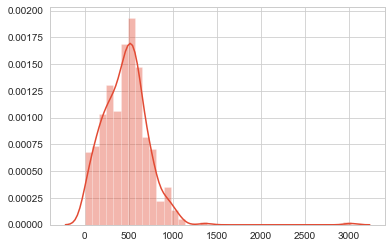

In [98]:
word_counts = []
table = str.maketrans("","", string.punctuation.replace("'", ""))
for song in df[df['Artist'] == 'Drake']['Lyrics'].values:
    word_counts.append(len(song.lower().translate(table).split()))
    #print(song.lower().translate(table).split())
    #print((set(song.lower().translate(table).split())))
fig, ax = plt.subplots()
sns.distplot(word_counts, ax=ax)

In [99]:
for title, count in zip(drakesongs, word_counts):
    print(title, count)

God's Plan 347
In My Feelings 557
Hotline Bling 439
One Dance (Ft. Kyla & Wizkid) 394
Hold On, We're Going Home (Ft. Majid Jordan) 302
Know Yourself 558
Back to Back 526
All Me (Ft. 2 Chainz & Big Sean) 1023
Fake Love 474
From Time (Ft. Jhené Aiko) 744
0 to 100 / The Catch Up 953
The Motto (Ft. Lil Wayne) 526
Started from the Bottom 463
Pound Cake / Paris Morton Music 2 (Ft. JAY-Z) 1029
HYFR (Ft. Lil Wayne) 592
Marvin's Room 568
Nice For What 736
Passionfruit 228
Child's Play 627
Energy 500
Too Good (Ft. Rihanna) 545
Furthest Thing 601
Jungle 429
Over My Dead Body 612
Worst Behavior 547
Summer Sixteen 621
The Language 641
Girls Love Beyoncé (Ft. James Fauntleroy) 431
How Bout Now 518
Too Much 661
Shot for Me 430
Legend 399
Portland (Ft. Quavo & Travis Scott) 675
Nonstop 684
Controlla 404
Gyalchester 367
U With Me? 602
Own It (Ft. PARTYNEXTDOOR) 530
Headlines 595
Fire & Desire 340
Doing It Wrong 364
Crew Love (Ft. The Weeknd) 365
Wu-Tang Forever 536
Look What You've Done 770
I'm Upset 4

In [100]:
def plot_word_counts(df, artist):
    '''
    Given an artist, this function plots histograms associated with that
    artist's word counts in lyrics.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''
    fig, axs = plt.subplots(2, 1, figsize=(8,12))
    counts = []
    unique_counts = []
    table = str.maketrans("","", string.punctuation.replace("'", ""))
    
    for song in df[df['Artist'] == artist]['Lyrics'].values:
        counts.append(len(song.lower().translate(table).split()))
        unique_counts.append(len(set(song.lower().translate(table).split())))
    
    sns.distplot(counts, ax=axs[0], kde=False, color='mediumslateblue')
    axs[0].set_title(f'Total Word Counts in Songs by {artist}')
    axs[0].set_xlabel('Total Words')
    axs[0].set_ylabel('Counts')
    
    sns.distplot(unique_counts, ax=axs[1], kde=False, color='slateblue')
    axs[1].set_title(f'Unique Word Counts in Songs by {artist}')
    axs[1].set_xlabel('Unique Words')
    axs[1].set_ylabel('Counts')
    plt.show()

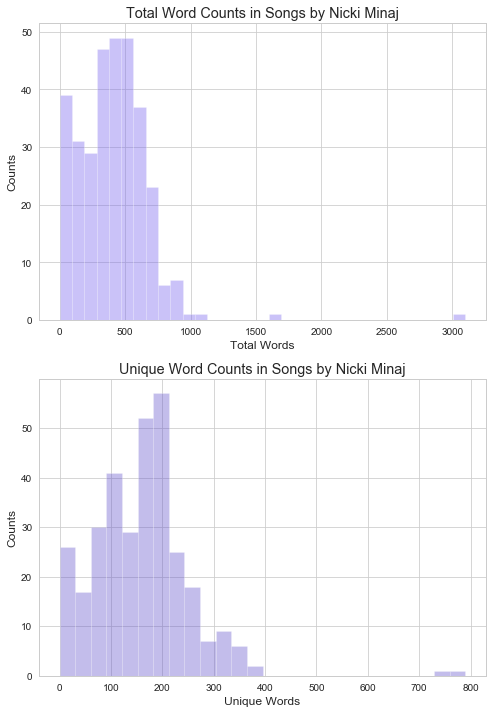

In [101]:
plot_word_counts(df, 'Nicki Minaj')

In [103]:
lyrics_word_count = []
table = str.maketrans("","", string.punctuation.replace("'", ""))
for song in df['Lyrics'].values:
    lyrics_word_count.append(len(song.lower().translate(table).split()))
lyrics_word_count

[735,
 1056,
 461,
 550,
 781,
 555,
 904,
 865,
 789,
 569,
 646,
 924,
 557,
 443,
 546,
 618,
 1012,
 499,
 429,
 677,
 471,
 620,
 528,
 538,
 902,
 711,
 485,
 509,
 307,
 656,
 560,
 518,
 482,
 826,
 471,
 305,
 649,
 525,
 577,
 548,
 718,
 489,
 677,
 325,
 376,
 532,
 615,
 365,
 527,
 416,
 533,
 441,
 362,
 183,
 510,
 1378,
 361,
 499,
 555,
 702,
 857,
 362,
 439,
 543,
 566,
 376,
 596,
 567,
 427,
 458,
 399,
 406,
 441,
 439,
 388,
 330,
 521,
 628,
 263,
 430,
 297,
 465,
 470,
 587,
 522,
 441,
 449,
 530,
 233,
 748,
 277,
 394,
 361,
 349,
 272,
 56,
 333,
 593,
 693,
 314,
 584,
 459,
 8,
 312,
 200,
 622,
 379,
 118,
 1406,
 414,
 420,
 217,
 352,
 266,
 454,
 781,
 433,
 485,
 87,
 395,
 87,
 179,
 60,
 178,
 38,
 30,
 592,
 626,
 752,
 321,
 107,
 35,
 262,
 26,
 87,
 18,
 19,
 672,
 430,
 550,
 34,
 34,
 865,
 718,
 599,
 565,
 469,
 683,
 509,
 592,
 437,
 556,
 514,
 656,
 395,
 588,
 534,
 894,
 653,
 643,
 574,
 837,
 790,
 801,
 503,
 804,
 295,
 390,
 46

In [104]:
df['Word Count'] = lyrics_word_count

In [105]:
# Inspecting songs with word counts below 100
for song in df[df['Word Count'] < 100]['Lyrics'].values:
    print(song)
    print('_____________________')

Lyrics from Snippet

 hoe ass nigga in the met
Niggas keep talkin' that U.K. shit like I don't got AKs
Like, 'cause I was born overseas, these muhfuckers ain't gon' spray-spray
Pull up in your hood, nigga, 9-1-1, y'all better call mayday
From Glenwood all the way to Martin Luther King, niggas know we don't play-play
_____________________
Lyrics will be available upon release. Stay tuned!
_____________________
Lyrics from Snippet

 all these feelings I done hurt
Gun smoke, broad day
Nigga, gun smoke, late night
Nigga, gun smoke, any time
Gun smoke, anybody
Nigga, we got plenty bodies
We'll come and see about it
Got your buddy killed about it
Y'all ain't did shit about it, pussy
You know how I'm rockin' in this bitch, pussy
You know it get to poppin' in this bitch, pussy
I ain't goin' to war about a bitch, pussy
I ain't talkin' to the law about shit, pussy
_____________________
Lyrics from Snippet

No stressin'
Metro Boomin want some more, nigga!
No stressin'
I troop, lil' nigga I bless 

_____________________
My man Shawn
From around the way
_____________________
Bruh
_____________________
Transcribing
_____________________
Yeah, you know what I'm sayin'?
Rest in peace to my nigga Pick
And rest in peace to the lil' niggas that's rollin' a dime of weed and an eight of Grabba
_____________________
David, you want me to fix you a plate?
Anna May, shut the fuck up
_____________________
          
            Lyrics for this song have yet to be released. Please check back once the song has been released.
          
        
_____________________
"I knew that was a great one when Em called me to talk about that line,"
Jadakiss says in an interview with XXL
"That’s when I knew that was a good one
He felt that line just as well as you felt it
This is when I was thinkin’ about it
That was a pat on the back for me
I felt good getting a call from one of my colleagues that I got a lot of respect for to feel that bar right there
That probably helped to get him on there, liking that

_____________________
I hear the girls scream soon as we arrivin'
You can ask Ibn, we be straight mackin'
Y'all work at IBM, hotels they be in
Ooh la la, tres bien magnifique
Any street
Father is the black Bruce Wayne
Only shorty in preschool rockin' two chains
If you talkin' 'bout marriage, you mean multi-million heiress
_____________________
I wanted to take white trash t-shirts and make it a video. I wanted to make it as phony as possible. I wanted to show you that this is the type of imagery that has been presented to us for years, and the only difference is a black man in the middle.
_____________________
Uh, yeah
Uh, uh

Hopped off the Amistad and made "I'm a God"
It's always a lituation when I'm involved
It's always a lituation when I'm involved
See, I say what they say when the mic is off

Parents are the strippers, strip kids of they confidence
Teach white dominance, question your common sense
See, I've been washed in tradition and I'ma rinse

Hopped off the Amistad and made "

_____________________
Hey, baby?
Yeah?
You know we've been together for a long time, right?
Yeah. 
Well, I got one question to ask you. 
Yes?
Will you marry me?
Yes!
Good, but I got one mo' question. 
Yeah?
Will you sign a pre-numptual agreement?
What?
(Break!)
_____________________
Hey baby
Wutsup?
...What do i gotta do to get
A tip-dance?
Psht... you know what you gotta do ...ya kno gimme some head..
Naw i'm juss fuckin wit ya baby, i'm juss fuckin wit ya...juss go get 2 of your friends...and tell the dj to play
Somethin long n' slow...
Alright, baby
_____________________
My suit is dark my clouds are gray
And all things around me pass away
Well what if I leave
Yeah thats what I'll do I'll leave
Cause 88 keys is all I got to lose
That ain't much, you can have them shoes
I'm dyin to love dyin to play
Dyin to get out of here
I'm dyin to live
(female singers)
Percival (ohhh)
Says goodye (ohhh)
An angel dies
_____________________
(Alicia Keys)
So, how would I look laid out on a table, hu

        
_____________________
          
            Lyrics for this song have yet to be released. Please check back once the song has been released.
          
        
_____________________
(Verse 1)
What I care about a river rat
Old maggot pussy alley ho
Punk bitch, you better stay in line there, don't come off your patio
Catch me out in Cali, ho, ask a ratchet how they do that
Get wrong with me, don't do that
Bitch, I'm throwed I thought you knew that
Got an ounce with me a two gats
So anybody wig get blew back
No exaggeration, true fact, I will set fire to where you at
_____________________
If it anit about the money
_____________________
Ye-yeah, Hey shawty this is me T.I
_____________________
          
            Lyrics for this song have yet to be released. Please check back once the song has been released.
          
        
_____________________
          
            Lyrics for this song have yet to be released. Please check back once the song has been released.
        

In [106]:
# Inspecting songs with word counts above 2000
df[df['Word Count'] > 2000]

,Artist,Title,Album,Producer,Release Date,URL,Lyrics,Word Count
967,2Pac,Tupac & Monster Kody Phone Conversation Octobe...,None,None,1995-10-18,https://genius.com/2pac-tupac-and-monster-kody...,"T: Sanyika, what's up?\nS: 2Pac true playa. I ...",4916
2305,Beastie Boys,Ill Communication,None,None,None,https://genius.com/Beastie-boys-ill-communicat...,"You Can't, You Won't And You Don't Stop\nMike ...",5488
3290,Bone Thugs-N-Harmony,Fastest Rap Song (Ft. Twista),None,None,None,https://genius.com/Bone-thugs-n-harmony-fastes...,Yeah. runaway statue. Here we gooooo\nWay 2 st...,2150
3292,Bone Thugs-N-Harmony,20th Year Anniversary Cypher,None,DJ Quik,2013-10-22,https://genius.com/Bone-thugs-n-harmony-20th-y...,"Yeah (Buck! Buck!) come on y'all, it's goin' d...",2708
4356,Cam’ron,Dipset Hot 97 Freestyle (Ft. Hell Rell & J.R. ...,None,None,None,https://genius.com/Camron-dipset-hot-97-freest...,"New York City, you are now tuned in to America...",2264
7500,Drake,ESPYs Conference Call (Ft. ESPN),None,None,2014-07-11,https://genius.com/Drake-espys-conference-call...,Connor Shell:\nYou’re so vocal about how much ...,3020
8398,Eminem,Eminem Freestyles on Tim Westwood | 2009 (Ft. ...,None,Tim Westwood,2009-05-27,https://genius.com/Eminem-eminem-freestyles-on...,"Yo blast me off, Tim\nWhere's that boom?\nBlas...",2186
8599,Eminem,'99 Tim Westwood Freestyle (Ft. Proof),None,None,None,https://genius.com/Eminem-99-tim-westwood-free...,"Blastin' off(Aw yeah!)\nYo, I'm sayin' though,...",2431
8622,Eminem,"2004 Tim Westwood Freestyle (Ft. D12, Stat Quo...",None,DJ Green Lantern,None,https://genius.com/Eminem-2004-tim-westwood-fr...,I boss how I live\nFuck 'em hoe\nGod meant me\...,4002
8740,Eminem,Rolling Stone Q/A Exclusive 2013 (Ft. Brian Hi...,None,Rolling Stone,2013-11-01,https://genius.com/Eminem-rolling-stone-q-a-ex...,Are you feeling good about the album at this p...,3041


In [107]:
for value in df[(df['Title'].str.contains(r"Demo\)")
                 | df['Title'].str.contains(r"\(Demo")
                 | df['Title'].str.contains(r"\[Demo"))]['Title'].values:
    print(value)

Whole Lot (Demo) (Ft. Young Thug)
X (Demo)
Alien (Demo)
Things R Changing (Demo Version)
Holler If Ya Hear Me (Demo Version) (Ft. Live Squad)
Run Tha Streetz (Demo Version 3) (Ft. Michel'le & Napoleon (Outlawz))
Run Tha Streetz (Demo Version) (Ft. E.D.I. Mean & Napoleon (Outlawz))
Mad Man (Demo) (Ft. Playboi Carti)
Scenario (Demo 2) (Ft. Jarobi & Leaders of the New School)
Scenario (Demo 1) (Ft. Chris Lighty, Leaders of the New School, Mista Lawnge & Posdnuos)
Egg Raid on Mojo (Demo version)
"Transit Cop" (Demo Version)
Ultralight Beam (Demo)
BLEACH (Demo) (Ft. Ryan Beatty)
1999 WILDFIRE (Demo) (Ft. Jazze Pha)
Use Me (Demo)
Waves (Demo)
Brain Cells (Demo)
Successful (Demo)
From Florida with Love (Original Demo)
From Time (Demo) (Ft. Jhené Aiko)
Belong to the City (Demo)
Desires (Demo) (Ft. Future)
My Love (Demo)
Too Good (Demo) (Ft. Rihanna)
Too Good (Solo Demo)
God’s Plan (Demo) (Ft. Trippie Redd)
Pain 1993 (Demo) (Ft. Playboi Carti)
Time Flies (Demo) (Ft. Future)
Work (Demo) (Ft. PAR

In [109]:
for value in df[(df['Title'].str.lower().str.contains(r"interview\)")
                 | df['Title'].str.lower().str.contains(r"\(interview")
                 | df['Title'].str.lower().str.contains(r"\[interview"))]['Title'].values:
    print(value)

In [110]:
for value in df[(df['Title'].str.contains(r"Unreleased\)")
                 | df['Title'].str.contains(r"\(Unreleased")
                 | df['Title'].str.contains(r"\[Unreleased"))]['Title'].values:
    print(value)

Peep Game Part 2 (Unreleased)
Fake Ass Bitches (Unreleased Re-Recording)
One Day At A Time (Unreleased Remix) (Ft. Krayzie Bone & Outlawz)
Basket Case ('96 Sho Shot) [Unreleased] (Ft. Greg Nice)
Intergalactic (Unreleased Version)
Earthquake* (Unreleased)
Corrupt/I Remember (Unreleased)
All In (Unreleased)
The Kids (Unreleased Demo)
Slim Shady (Unreleased)
You Don't Wanna Fuck Wit These (Unreleased '93 Shit)
Old Town Road (Unreleased Version)
Fire (Unreleased)
Ether (Unreleased Edition)
The What (Unreleased Version) (Ft. Method Man)
Nasty Boy (Unreleased Version) (Ft. Janet Jackson)
Tsunami (Unreleased Snippet)*
What you wanna poo (Unreleased) (Ft. Anthony Hamilton & Stuey Rock & T.I.)


In [111]:
for value in df[df['Title'].str.contains(r"\(Leak")
                | df['Title'].str.contains(r"\[Leak")]['Title'].values:
    print(value)

Living Single (Leak) (Ft. Chance the Rapper, Jeremih & Smino)
Controlla (Leak) (Ft. Popcaan)
Cut Back (Leak)


In [112]:
for value in df[(df['Title'].str.lower().str.contains(r"excerpt\)")
                 | df['Title'].str.lower().str.contains(r"\(excerpt")
                 | df['Title'].str.lower().str.contains(r"\[excerpt"))]['Title'].values:
    print(value)

LUV (Excerpt)
Decoded: Part 1 (Excerpts)
Decoded: Part 2 (Excerpts)
Decoded: Part 3 (Excerpts)
Decoded: Epilogue (Excerpts)
Decoded: Part 4 (Excerpts)
Gone 'Til November (Excerpt)
Once Upon a Time in Shaolin (Excerpt) (Ft. Cher)


In [113]:
for value in df[(df['Title'].str.lower().str.contains(r"tedx\)")
                 | df['Title'].str.lower().str.contains(r"\(tedx")
                 | df['Title'].str.lower().str.contains(r"\[tedx"))]['Title'].values:
    print(value)

Hi, I'm Scott (TEDx Talk)


In [119]:
for value in df[(df['Title'].str.lower().str.contains(r"live\)")
                 | df['Title'].str.lower().str.contains(r"\(live")
                 | df['Title'].str.lower().str.contains(r"\[live"))]['Title'].values:
    print(value)

Runnin' (Dying to Live) (Ft. The Notorious B.I.G.)
Ambitionz Az A Ridah (Live)
All About U (Live)
How Do You Want It (Live)
Hit Em Up (Live)
Troublesome (Live)
Never Call You Bitch Again (Live)
For My Niggaz And Bitches (Live 1996) (Ft. Tha Dogg Pound)
All About U (Live 1996) (Ft. Outlawz)
2 Of Amerikaz Most Wanted (Live)
2 Of Amerikaz Most Wanted (Live 1996) (Ft. Tha Dogg Pound, K-Ci & JoJo, Nate Dogg, Outlawz & Snoop Dogg)
Ain't No Fun (If the Homies Can't Have None) (Live 1996) (Ft. Tha Dogg Pound)
California Love (Live)
Gin and Juice (Live 1996) (Ft. Tha Dogg Pound)
Some Bomb Azz (Pussy) (Live 1996) (Ft. Tha Dogg Pound)
What Would U Do (Live 1996) (Ft. Tha Dogg Pound)
How Do U Want It (Live 1996) (Ft. K-Ci & JoJo & Outlawz)
Never Call U Bitch Again (Live 1996) (Ft. Outlawz)
Hit 'Em Up (Live 1996) (Ft. Outlawz)
So Many Tears (Live)
Ambitionz Az a Ridah (Live 1996) (Ft. Outlawz)
Tattoo Tears (Live 1996) (Ft. Outlawz)
Freek'n You (Live 1996) (Ft. K-Ci & JoJo & Outlawz)
Troublesome (Li

In [114]:
for value in df[(df['Title'].str.lower().str.contains("press conference"))]['Title'].values:
    print(value)

Press Conference (Ft. Charlemagne & Safaree)


In [115]:
for value in df[(df['Title'].str.lower().str.contains("tweets"))]['Title'].values:
    print(value)

Tweets With T. Boone Pickens
Tweets About The Rap Industry
Tweets About Lean
Tweets About New Album and New Rules
Tweets on Tidal's Status
Tweets
Tweets: July 21, 2015


In [116]:
for value in df[(df['Title'].str.lower().str.contains("reddit"))]['Title'].values:
    print(value)

Reddit AMA (Ft. /r/AskReddit)
Reddit AMA
Reddit AMA (Ft. /r/AskReddit)


In [126]:
for value in df[(df['Title'].str.lower().str.contains("mix"))]['Title'].values:
    print(value)

Spend It (Remix) (Ft. T.I.)
MF'N Right (Remix) (Ft. Lil Wayne)
Pimps (Remix) (Ft. Big K.R.I.T. & Bun B)
BFF (Remix) (Ft. Jeezy)
No lie remix
Mixed Seafood Grill Kebabs
Riot - Remix
Gettin Em -Hi Grade Remix (Ft. Sammie)
Untouchable (Swizz Beatz Remix) (Ft. Bone Thugs-N-Harmony)
My Block (Remix)
Dear Mama (Frank Nitty Remix) (Ft. Anthony Hamilton)
Loyal to the Game (G-Unit Remix) (Ft. G-Unit)
Niggaz Nature (Remix) (Ft. Lil' Mo)
Violent Killuminati (REMIX)
Dopefiend's Diner (Remix)
We Are Not Afraid (Remix) (Ft. The Notorious B.I.G.)
Can't Stop Me (Makavelian Souljah Force Remix)
Throw Up Ya Gunz (Remix) (Ft. Big Pun, Eazy-E & The Notorious B.I.G.)
Po Nigga Blues (Scott Storch Remix) (Ft. Ronald Isley)
California Love (Remix) (Ft. Dr. Dre & Roger Troutman)
Starin' Through My Rear View Remix (Ft. Dwele)
Pistol To My Head (Remix)
187 On A Hook (Remix) (Ft. C-Bo & Tech N9ne)
Gangster's Paradise (Remix)
Bullet To The Brain (Remix) (Ft. Eminem)
U Can Call (Jazze Pha Remix) (Ft. Jazze Pha)
I S

Get Ur Freak On (Remix) (Ft. Twista)
One Minute Man (Video Remix) (Ft. Ludacris & Trina)
4 My People (Basement Jaxx Remix)
Take Away (Remix) (Ft. Ginuwine & Tweet)
Hot (Ratatat remix)
Hot boyz - remix original version
Bad Man (Diplo remix)
Wake Up (Ratatat remix)
4 My People (Basement Jaxx Vocal Remix)
Hot Boyz (DJ Tomekk's 2funky remix) (feat. Nas & Eve)
Hot Boyz (DJ Tomekk remix) (Ft. Lil' Mo)
GET UR FREAK ON (HELVETICAN REMIX)
Teary Eyed (Sugardip Morning After mix)
Teary Eyed (ATFC club mix)
Teary Eyed (Maurice Joshua club mix)
Teary Eyed (Tiefschwarz club mix)
Quiet Storm (Remix) (Ft. Lil' Kim)
Survival of the Fittest (Remix) (Extended Version)
Henny (Remix) (Ft. Busta Rhymes, French Montana & Mack Wilds)
Got it Twisted (Remix) (Ft. Twista)
G.O.D. Pt. III (Remix)
Temperature's Rising (Remix) (Ft. Crystal Johnson)
Survival of the Fittest (Remix)
Dirt (Remix) (Ft. Ghostface Killah)
Peer Pressure (The Large Professor Remix)
Front Lines (13th Chamber Remix)
Y.B.E. (Remix) (Ft. Bars-n-

In [135]:
for value in df[(df['Lyrics'].str.lower().str.contains("lyrics from snippet"))]['Title'].values:
    print(value)

Solid*
Untitled Snippet (4/24/19)*
Untitled Snippet (2/15/20)*
Move Your Hips* (Ft. MadeinTYO & Nicki Minaj)
It’s Best for Me to Go*
More Thoughts*
Lucky Me
Street Legend* (Ft. Nipsey Hussle)
Break Hearts* (Ft. Lil Uzi Vert)
21
Shorter*
Kobe Bryant Tribute* (Ft. The Game)
BANKROLL* (Ft. A$AP Rocky)
HOOD STILL LOVE ME*
Wonder What You Want Right Now
WINTERTIME*
RICH BOY
Edamame
Our Song
Technical Difficulties
Wake Up Call (Ft. Ryan Beatty)
Stole My Heart
Me And My Boys
Need You To Get Back* (Ft. Ryan Beatty)
Do It All Again
Prada
Something Between Us
Styling*
Respect
Mr Perfect
Mooliani (Ft. Lil Uzi Vert)
Skkrt Skkrt Skkrt Skkrt Skkrt
Joker*
Girls*
Burnt Out*
Row Boat Boat* (Ft. JPEGMAFIA)
Need Me (Lotta 42)*
Greece*
In the Cut* (Ft. Roddy Ricch)
Righteous* (Ft. Popcaan)
Lie To Me*
True Story*
Black Emperor*
Now You Don't*
Trapped in the Sun
Pardon Me* (Ft. Lil Yachty)
Stars* (Ft. Rich Homie Quan)
Made Sexy*
Reward It*
Fears*
Graduated
Pound Down*
Shine
Born Alone Die Alone
Facts
Set My

In [136]:
for value in df[(df['Lyrics'].str.lower().str.contains("lyrics compiled"))]['Title'].values:
    print(value)

We Don't Play* (Ft. Offset & Swae Lee)


In [145]:
def clean_df(df):
    '''
    Given a dataframe, this function drops rows for songs that are
    snippets, demos, or otherwise incomplete.

    Parameters:
    df (dataframe): dataframe
    '''
    # Remove songs with < 100 words (typically skits/incomplete songs)
    df.drop(df[df['Word Count'] < 100].index, inplace=True)
        # Remove songs with > 3000 words (typically noise/non-songs)
    df.drop(df[df['Word Count'] > 3000].index, inplace=True)
    # Remove demos
    df.drop(df[(df['Title'].str.contains(r"Demo\)")
                | df['Title'].str.contains(r"\(Demo")
                | df['Title'].str.contains(r"\[Demo"))].index,
            inplace=True)
    # Remove snippets
    df.drop(df[(df['Title'].str.lower().str.contains(r"snippet\)")
                | df['Title'].str.lower().str.contains(r"\(snippet")
                | df['Title'].str.lower().str.contains(r"\[snippet"))]
            .index, inplace=True)
    # Remove unreleased tracks
    df.drop(df[(df['Title'].str.contains(r"Unreleased\)")
                | df['Title'].str.contains(r"\(Unreleased")
                | df['Title'].str.contains(r"\[Unreleased"))].index,
            inplace=True)
    # Remove leaks
    df.drop(df[df['Title'].str.contains(r"\(Leak")
               | df['Title'].str.contains(r"\[Leak")].index, inplace=True)
    # Remove excerpts
    df.drop(df[(df['Title'].str.lower().str.contains(r"excerpt\)")
                | df['Title'].str.lower().str.contains(r"\(excerpt")
                | df['Title'].str.lower().str.contains(r"\[excerpt"))]
            .index, inplace=True)
    # Remove Ted Talks
    df.drop(df[(df['Title'].str.lower().str.contains(r"tedx\)")
                | df['Title'].str.lower().str.contains(r"\(tedx")
                | df['Title'].str.lower().str.contains(r"\[tedx"))].index, inplace=True)
    # Remove Instagram content
    df.drop(df[(df['Title'].str.lower().str.contains("instagram"))]
            .index, inplace=True)
    # Remove Twitter content
    df.drop(df[(df['Title'].str.lower().str.contains("tweets"))].index,
            inplace=True)
    df.drop(df[(df['Title'].str.lower().str.contains("twitter"))].index,
            inplace=True)
    # Remove Reddit content
    df.drop(df[(df['Title'].str.lower().str.contains("reddit"))].index,
            inplace=True)
    # Remove Facebook content
    df.drop(df[(df['Title'].str.lower().str.contains("facebook"))].index,
            inplace=True)
    # Removed edited songs
    df.drop(df[(df['Title'].str.lower().str.contains("edited"))].index,
            inplace=True)
    # Remove Live songs to reduce redundancy
    df.drop(df[(df['Title'].str.lower().str.contains(r"live\)")
                 | df['Title'].str.lower().str.contains(r"\(live")
                 | df['Title'].str.lower().str.contains(r"\[live"))]
            .index, inplace=True)
    # Remove alternate versions
    df.drop(df[(df['Title'].str.contains("alternate"))].index,
            inplace=True)
    # Remove alternate versions
    df.drop(df[(df['Title'].str.contains("version"))].index,
            inplace=True)
    # Remove snippets
    df.drop(df[(df['Lyrics'].str.lower().str
                .contains("lyrics from snippet"))].index, inplace=True)
    df.drop(df[(df['Lyrics'].str.lower().str.contains("compiled from"))]
            .index, inplace=True)
    # Reset the indices
    df.reset_index(drop=True, inplace=True)
    return df

In [146]:
df = clean_df(df)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26188 entries, 0 to 26187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        26188 non-null  object
 1   Title         26188 non-null  object
 2   Album         26188 non-null  object
 3   Producer      26188 non-null  object
 4   Release Date  26188 non-null  object
 5   URL           26188 non-null  object
 6   Lyrics        26188 non-null  object
 7   Word Count    26188 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [148]:
df.tail(25)

,Artist,Title,Album,Producer,Release Date,URL,Lyrics,Word Count
26163,Young Thug,"Posse Cut (Elbow) (Ft. Cheat Code, Gunna, Lil ...",None,Wheezy,None,https://genius.com/Young-thug-posse-cut-elbow-...,They hit the spot for a elbow (Elbow)\nJust to...,1064
26164,Young Thug,Frum da Back,None,Ferrari Smash,2013-04-01,https://genius.com/Young-thug-frum-da-back-lyrics,I like the way you make that thang roll like a...,563
26165,Young Thug,Once (Ft. Hoodrich Pablo Juan & Lil Jamez),None,Billboard Hitmakers,None,https://genius.com/Young-thug-once-lyrics,"(Billboard Hitmakers)\nThugger\nAy, I'm on som...",595
26166,Young Thug,Let Me Live,None,None,2013-02-01,https://genius.com/Young-thug-let-me-live-lyrics,"Yo, Josh\nYou recognize I had my hoodie on tod...",592
26167,Young Thug,Till I Die,None,London on da Track,2017-01-01,https://genius.com/Young-thug-till-i-die-lyrics,I hear the cry of an angel\nI hear the scream ...,673
26168,Young Thug,Money (The Root),None,Narcos,None,https://genius.com/Young-thug-money-the-root-l...,"Jeffery!\nSlatt, slatt, slatt, slatt\nYeah\n\n...",509
26169,Young Thug,Luve Come Thru (Ft. Sonyae),None,Wheezy,None,https://genius.com/Young-thug-luve-come-thru-l...,"Love, come through\nLove, call you\nI know bee...",533
26170,Young Thug,Turn It Up 4 Me (Ft. Travis Porter),None,None,None,https://genius.com/Young-thug-turn-it-up-4-me-...,(Travis Porter)\nShake that ass for my brother...,695
26171,Young Thug,Love (Rollercoaster),None,None,None,https://genius.com/Young-thug-love-rollercoast...,I don’t know what to do without you\nCigarette...,417
26172,Young Thug,Majelique,None,Swizz Beatz,None,https://genius.com/Young-thug-majelique-lyrics,"Yeah, yeah\nAll my niggas here\nFor real\nAll ...",229


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26188 entries, 0 to 26187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist        26188 non-null  object
 1   Title         26188 non-null  object
 2   Album         26188 non-null  object
 3   Producer      26188 non-null  object
 4   Release Date  26188 non-null  object
 5   URL           26188 non-null  object
 6   Lyrics        26188 non-null  object
 7   Word Count    26188 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [188]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce',
                                    infer_datetime_format=True)

In [196]:
df['Year'].value_counts().index.sort_values()

Float64Index([1729.0, 1976.0, 1977.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
              1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
              1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0,
              2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0,
              2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
              2019.0, 2020.0, 2022.0],
             dtype='float64')

In [202]:
def find_decade(row):
    '''
    Given a row with years, this function creates decades (for apply)
    Parameters:
    row (dataframe): row of a dataframe
    '''
    if (row['Year'] >= 1970) and (row['Year'] < 1990):
        decade = '1970/80s'
    elif (row['Year'] >= 1990) and (row['Year'] < 2000):
        decade = '1990s'
    elif (row['Year'] >= 2000) and (row['Year'] < 2010):
        decade = '2000s'
    elif (row['Year'] >= 2010) and (row['Year'] < 2020):
        decade = '2010s'
    else:
        decade = 0
    return decade

In [203]:
df['Decade'] = df.apply(find_decade, axis=1)

In [204]:
df_decades = df[df['Decade'] != 0]

In [205]:
df_decades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18470 entries, 0 to 26182
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Artist        18470 non-null  object        
 1   Title         18470 non-null  object        
 2   Album         18470 non-null  object        
 3   Producer      18470 non-null  object        
 4   Release Date  18470 non-null  datetime64[ns]
 5   URL           18470 non-null  object        
 6   Lyrics        18470 non-null  object        
 7   Word Count    18470 non-null  int64         
 8   Year          18470 non-null  float64       
 9   Decade        18470 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.6+ MB


In [207]:
# It's modeling time
import spacy

In [208]:
nlp = spacy.load("en_core_web_lg")

In [209]:
bankaccount = (df['Lyrics'].values[0])
type(bankaccount)

str

In [226]:
# Tokenizing data
doc = nlp(bankaccount)
token_list = []
for token in doc:
    token_list.append(token.text)
print(token_list)

['Ooh', ',', 'ooh', ',', 'ooh', ',', 'ow', ',', 'ow', ',', 'ow', '\n', 'Wow', ',', 'wow', ',', 'ow', ',', 'ah', ',', 'ow', ',', 'ah', ',', 'ah', ',', 'ah', '\n\n', 'I', 'buy', 'a', 'new', 'car', 'for', 'the', 'bitch', '(', 'for', 'real', ')', '\n', 'I', 'tear', 'down', 'the', 'mall', 'with', 'the', 'bitch', '(', 'for', 'real', ')', '\n', 'You', 'ca', "n't", 'even', 'talk', 'to', 'the', 'bitch', '(', 'no', ')', '\n', 'She', 'fucking', 'with', 'bosses', 'and', 'shit', '(', 'on', 'God', ')', '\n', 'I', 'pull', 'up', 'in', "'", 'Rari', "'s", 'and', 'shit', '(', 'skrrr', ')', '\n', 'With', 'choppers', 'and', 'Harley', "'s", 'and', 'shit', '(', 'for', 'real', ')', '\n', 'I', 'be', "Gucci'd", 'down', '(', 'Gucci', ')', '\n', 'You', 'wearing', 'Lacoste', 'and', 'shit', '(', 'bitch', ')', '\n', 'Yeah', ',', 'Moncler', ',', 'yuh', ',', 'fur', 'came', 'off', 'a', 'bear', ',', 'yuh', '(', 'yeah', ')', '\n', 'Triple', 'homicide', ',', 'put', 'me', 'in', 'a', 'chair', ',', 'yuh', '(', 'in', 'jail', 

In [211]:
# CLeaning data (stopwords & punctuation)
stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [212]:
from spacy.lang.en.stop_words import STOP_WORDS

In [227]:
clean_bankaccount = []
for word in doc:
    if word.is_stop==False:
        clean_bankaccount.append(word)
clean_bankaccount

[Ooh,
 ,,
 ooh,
 ,,
 ooh,
 ,,
 ow,
 ,,
 ow,
 ,,
 ow,
 ,
 Wow,
 ,,
 wow,
 ,,
 ow,
 ,,
 ah,
 ,,
 ow,
 ,,
 ah,
 ,,
 ah,
 ,,
 ah,
 
 ,
 buy,
 new,
 car,
 bitch,
 (,
 real,
 ),
 ,
 tear,
 mall,
 bitch,
 (,
 real,
 ),
 ,
 talk,
 bitch,
 (,
 ),
 ,
 fucking,
 bosses,
 shit,
 (,
 God,
 ),
 ,
 pull,
 ',
 Rari,
 shit,
 (,
 skrrr,
 ),
 ,
 choppers,
 Harley,
 shit,
 (,
 real,
 ),
 ,
 Gucci'd,
 (,
 Gucci,
 ),
 ,
 wearing,
 Lacoste,
 shit,
 (,
 bitch,
 ),
 ,
 Yeah,
 ,,
 Moncler,
 ,,
 yuh,
 ,,
 fur,
 came,
 bear,
 ,,
 yuh,
 (,
 yeah,
 ),
 ,
 Triple,
 homicide,
 ,,
 chair,
 ,,
 yuh,
 (,
 jail,
 ),
 ,
 Triple,
 cross,
 plug,
 ,,
 play,
 fair,
 ,,
 yuh,
 (,
 God,
 ),
 ,
 Got,
 'em,
 tennis,
 chains,
 real,
 blingy,
 (,
 bling,
 ),
 ,
 Draco,
 chicken,
 head,
 like,
 Chingy,
 (,
 Chingy,
 ),
 ,
 Walk,
 Neiman,
 Marcus,
 spend,
 light,
 (,
 ),
 ,
 proceed,
 caution,
 ,,
 shooters,
 ,,
 right,
 (,
 21,
 ),
 ,
 Bad,
 bitch,
 ,,
 cute,
 face,
 nice,
 titties,
 ,
 $,
 7500,
 Saint,
 Laurent,
 jacket,
 (,
 yeah

In [228]:
for word in doc:
    print(word.text,word.lemma_)

Ooh ooh
, ,
ooh ooh
, ,
ooh ooh
, ,
ow ow
, ,
ow ow
, ,
ow ow

 

Wow wow
, ,
wow wow
, ,
ow ow
, ,
ah ah
, ,
ow ow
, ,
ah ah
, ,
ah ah
, ,
ah ah


 


I -PRON-
buy buy
a a
new new
car car
for for
the the
bitch bitch
( (
for for
real real
) )

 

I -PRON-
tear tear
down down
the the
mall mall
with with
the the
bitch bitch
( (
for for
real real
) )

 

You -PRON-
ca can
n't not
even even
talk talk
to to
the the
bitch bitch
( (
no no
) )

 

She -PRON-
fucking fuck
with with
bosses boss
and and
shit shit
( (
on on
God God
) )

 

I -PRON-
pull pull
up up
in in
' '
Rari Rari
's 's
and and
shit shit
( (
skrrr skrrr
) )

 

With with
choppers chopper
and and
Harley Harley
's 's
and and
shit shit
( (
for for
real real
) )

 

I -PRON-
be be
Gucci'd Gucci'd
down down
( (
Gucci Gucci
) )

 

You -PRON-
wearing wear
Lacoste Lacoste
and and
shit shit
( (
bitch bitch
) )

 

Yeah yeah
, ,
Moncler Moncler
, ,
yuh yuh
, ,
fur fur
came come
off off
a a
bear bear
, ,
yuh yuh
( (
yeah yeah
) )

 

Tri

raised raise
me -PRON-
, ,
I -PRON-
'm be
a a
whole whole
bastard bastard


In [229]:
for word in doc:
    print(word.text,word.pos_)

Ooh INTJ
, PUNCT
ooh INTJ
, PUNCT
ooh INTJ
, PUNCT
ow INTJ
, PUNCT
ow INTJ
, PUNCT
ow INTJ

 SPACE
Wow INTJ
, PUNCT
wow INTJ
, PUNCT
ow INTJ
, PUNCT
ah INTJ
, PUNCT
ow INTJ
, PUNCT
ah INTJ
, PUNCT
ah INTJ
, PUNCT
ah INTJ


 SPACE
I PRON
buy VERB
a DET
new ADJ
car NOUN
for ADP
the DET
bitch NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
I PRON
tear VERB
down ADP
the DET
mall NOUN
with ADP
the DET
bitch NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
You PRON
ca VERB
n't PART
even ADV
talk VERB
to ADP
the DET
bitch NOUN
( PUNCT
no INTJ
) PUNCT

 SPACE
She PRON
fucking VERB
with ADP
bosses NOUN
and CCONJ
shit NOUN
( PUNCT
on ADP
God PROPN
) PUNCT

 SPACE
I PRON
pull VERB
up ADP
in ADP
' PUNCT
Rari PROPN
's PART
and CCONJ
shit PROPN
( PUNCT
skrrr PROPN
) PUNCT

 SPACE
With ADP
choppers NOUN
and CCONJ
Harley PROPN
's PART
and CCONJ
shit NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
I PRON
be VERB
Gucci'd PROPN
down ADP
( PUNCT
Gucci PROPN
) PUNCT

 SPACE
You PRON
wearing VERB
Lacoste PROPN
and

In [216]:
from spacy import displacy

In [217]:
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(Rari, 'ORG', 383),
 (Harley, 'ORG', 383),
 (Gucci, 'PERSON', 380),
 (Moncler, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (Chingy (Chingy), 'ORG', 383),
 (Neiman Marcus, 'PERSON', 380),
 (a light fifty, 'CARDINAL', 397),
 (fifty, 'CARDINAL', 397),
 (7500, 'MONEY', 394),
 (Bitch, 'PERSON', 380),
 (dumpin, 'PERSON', 380),
 (skreets, 'PERSON', 380),
 (Rari, 'PERSON', 380),
 (skrrr, 'PERSON', 380),
 (playin, 'PERSON', 380),
 (21, 'CARDINAL', 397),
 (Casper, 'GPE', 384),
 (21, 'DATE', 391),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (21, 'CARDINAL', 397),
 (6, 'CARDINAL', 397),
 (21, 'CARDINAL', 397),
 (O'Neal, 'ORG', 383),
 (Reggie Mill', 'PERSON', 380),
 (21, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (ruh-rah, 'PERSON', 380),
 (Siggy, 'ORG', 383),
 (Bitch, 'PERSON', 380),
 (Mad Max, 'PERSON', 380),
 (Ziggy, 'PERSON', 380),
 (Bentley, 'PERSON', 380),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 

In [218]:
displacy.render(doc, style = "ent", jupyter = True)

In [219]:
print(doc.vector)

[-1.27881199e-01  1.63915306e-01 -1.68152750e-01 -4.64357026e-02
  6.72931820e-02 -2.32086936e-03 -1.34998262e-02 -1.71375722e-01
 -1.88584700e-02  1.53361118e+00 -1.90905720e-01  1.08246237e-01
  1.05320454e-01 -9.85784456e-02 -1.60172462e-01  2.24748719e-02
 -5.37507236e-02  9.78800893e-01 -1.75086826e-01  2.64664758e-02
  1.80878527e-02  2.73286570e-02 -4.51540276e-02  8.41251807e-04
  2.52506714e-02 -4.89349626e-02 -5.48725426e-02 -8.53475034e-02
  1.69111669e-01 -6.94546625e-02 -1.76345408e-02  1.60465494e-01
 -9.36853513e-02  1.16512135e-01  1.00334346e-01 -1.97224338e-02
  5.30757271e-02  1.16904892e-01 -8.43116865e-02  3.17012481e-02
 -7.20345899e-02 -3.99485193e-02 -1.17048193e-02 -1.01330161e-01
  2.42100786e-02  6.18279614e-02 -7.21032768e-02  3.64572890e-02
  4.65440080e-02  5.68956137e-02  2.38727760e-02  1.17700540e-01
 -2.14265212e-02  2.86314171e-02 -2.82228310e-02  1.08333096e-01
 -3.07749063e-02 -6.66793734e-02  5.91673590e-02 -8.13187212e-02
 -4.11373787e-02 -9.23814

In [220]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [230]:
def spacy_tokenizer(song):
    '''
    Given a song, this function tokenizes it, lemmatizes it, and strips
    punctuation and stop words.

    Parameters:
    song (string): dataframe
    '''
    # Establish punctuation and stopwords from spaCy in conjunction with
    # self-identified stop words in rap
    punctuations = string.punctuation
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    rapwords = {'oh', 'aye', 'yeah', 'yuh', 'huh', 'ha', 'hah', 'ow',
                'ah', 'um', 'umm', '’', 'na', 'nah', 'w/', 'yo', 'w',
                'ooh', 'oooh', 'oohwee', 'oohweee', 'oo', 'ooo', 'oooo',
                'fuck', 'shit', 'bitch', 'damn', 'hell', 'nigga', 'skrt',
                'skrrt', 'skrrrt'}
    stopwords = stop_words|rapwords
    # Create a spaCy document and strip unneeded features
    doc = nlp(song)
    tokens = ([word.lemma_.lower().strip() if word.lemma_ != "-PRON-"
               else word.lower_ for word in doc])
    tokens = ([word for word in tokens if word not in stopwords
               and word not in punctuations])
    return tokens

In [231]:
(set(spacy_tokenizer(bankaccount)))

{"'em",
 '1',
 '2',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '7500',
 '8',
 'account',
 'action',
 'ashe',
 'asthma',
 'bad',
 'bank',
 'bastard',
 'bear',
 'bentley',
 'bil',
 'bill',
 'black',
 'bling',
 'blingy',
 'block',
 'body',
 'boss',
 'busy',
 'buy',
 'car',
 'careful',
 'case',
 'casper',
 'catch',
 'caution',
 'chain',
 'chair',
 'chase',
 'chicken',
 'chingy',
 'chopper',
 'clip',
 'cock',
 'come',
 'copy',
 'cross',
 'cuffin',
 'cute',
 'dawg',
 'dawg—21',
 'dick',
 'dog',
 'draco',
 'dumpin',
 'dunk',
 'eel',
 'face',
 'fair',
 'fast',
 'faster',
 'fur',
 'gas',
 'ghost',
 'glock',
 'god',
 'got',
 'gucci',
 "gucci'd",
 'gun',
 'harley',
 'head',
 'hills',
 'hit',
 'homicide',
 'house',
 'jacket',
 'jail',
 'jiggy',
 'kill',
 'know',
 'lacoste',
 'laurent',
 'light',
 'like',
 'lil',
 'm',
 'mad',
 'mag',
 'mall',
 'marcus',
 'matte',
 'max',
 'mil',
 'mill',
 'moncler',
 'neiman',
 'new',
 'nice',
 "o'neal",
 'play',
 'playin',
 'plug',
 'plus',
 'proceed',
 'pull',
 'rah'

In [232]:
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [235]:
X = df_decades['Lyrics']
y = df_decades['Decade']

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [241]:
y_train.value_counts()

2010s       7577
2000s       3479
1990s       1637
1970/80s     236
Name: Decade, dtype: int64

In [239]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [242]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [243]:
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer,
                        max_features = 10000)

In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=10,
                             random_state=0)
X_train = tfidf.fit_transform(X_train)
rfc.fit(X_train, y_train)
X_test = tfidf.transform(X_test)
y_predict = rfc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

In [ ]:
# Plot the feature importance
feat_scores = pd.Series(rfc.feature_importances_,
                        index = tfidf.get_feature_names())
feat_scores = feat_scores.sort_values(ascending=False)
for word, score in zip(feat_scores.index, feat_scores):
    print(f"{word}: {score}")

In [ ]:
ax = feat_scores[:20].plot(kind='barh', figsize=(10,16), color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average Contribution to Information Gain')

In [ ]:
tfidf.get_feature_names()

In [ ]:
# Gradient Boosting
gbc = GradientBoostingClassifier(learning_rate=0.001,
                                 n_estimators=100000,
                                 random_state=0,
                                 max_depth=20)
gbc.fit(X_train, y_train)
y_predict = gbc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))